# 0. 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

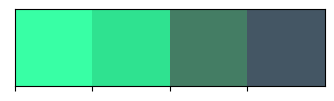

In [2]:
sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
color=['#38FFA5','#2FE290','#447D64', '#445664']

**Feature Description**


| Feature       | Description     |
|:--------------|:----------------|
| id            | 고유 id          |
| hour          | 시간             |
| hour_bef_temperature   | 기온             |
| hour_bef_precipitation | 비가 오지 않았으면 0, 비가 오면 1 |
| hour_bef_windspeed     | 풍속(평균)        |
| hour_bef_humidity      | 습도             |
| hour_bef_visibility    | 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미) |
| hour_bef_ozone         | 오존             |
| hour_bef_pm10          | 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지) |
| hour_bef_pm2.5         | 초미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지) |
| count         | 시간에 따른 따릉이 대여 수 |


# 1. 데이터 전처리

## 1-1. 호출

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
display(test.head())

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [4]:
train['hour_bef_precipitation'].unique()

array([ 1.,  0., nan])

## 1-2. 데이터 구조 평가

In [5]:
print(train.info()) ; print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Coun

In [6]:
train.rename(lambda x: x.lower().strip().replace('hour_bef_', ''), axis = 'columns', inplace = True)
test.rename(lambda x: x.lower().strip().replace('hour_bef_', ''), axis = 'columns', inplace = True)

In [7]:
print(train.columns) ; print(test.columns)

Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')
Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5'],
      dtype='object')


In [8]:
train.describe()

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [9]:
train.columns.to_series().groupby(train.dtypes).groups

{int64: ['id', 'hour'], float64: ['temperature', 'precipitation', 'windspeed', 'humidity', 'visibility', 'ozone', 'pm10', 'pm2.5', 'count']}

In [10]:
train.duplicated('id', keep = False).sum()

0

In [11]:
test.duplicated().sum()

0

## 1-3. 대상 변수 분포 확인

In [12]:
train.groupby('hour').mean()

,id,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


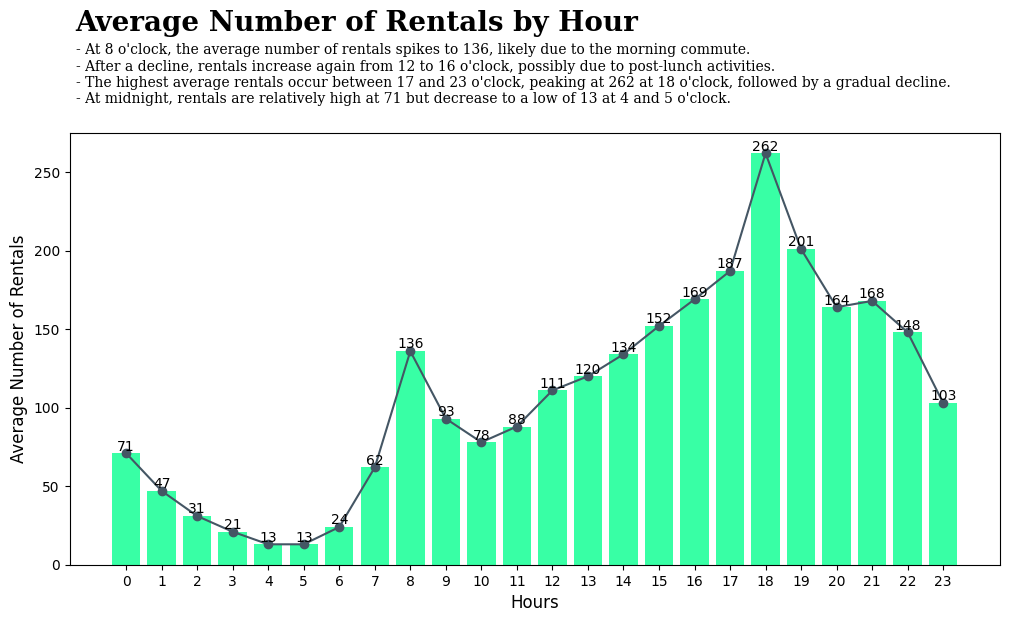

In [13]:
hours = train.groupby('hour')['count'].mean()

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

fig.text(0.13, 1, 'Average Number of Rentals by Hour', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.88
         , """- At 8 o'clock, the average number of rentals spikes to 136, likely due to the morning commute.
- After a decline, rentals increase again from 12 to 16 o'clock, possibly due to post-lunch activities.
- The highest average rentals occur between 17 and 23 o'clock, peaking at 262 at 18 o'clock, followed by a gradual decline.
- At midnight, rentals are relatively high at 71 but decrease to a low of 13 at 4 and 5 o'clock."""
         , fontsize=10, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.83)

bars = ax.bar(hours.index.astype(str), hours.values.astype(int), color = color[0])
line = ax.plot(hours.index.astype(str), hours.values.astype(int), color= color[-1], marker='o')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Average Number of Rentals', fontsize = 12)
plt.show()

1. 자정 시간대 (0시 - 6시):
- 0시: 평균 대여 수가 71회로 비교적 높은 수치를 보입니다.
- 1시 ~ 6시: 평균 대여 수가 점점 감소하여 4시와 5시에는 각각 13회로 가장 낮은 수치를 보입니다.

2. 아침 시간대 (7시 - 11시):
- 7시: 평균 대여 수가 62회로 다시 증가하기 시작합니다.
- 8시: 136회로 급격히 증가합니다. 이 시간대는 출근 시간과 겹치기 때문에 대여 수가 많은 것으로 보입니다.
- 9시 ~ 11시: 평균 대여 수가 다시 감소하여 9시에 93회, 11시에 78회를 보입니다.

3. 오후 시간대 (12시 - 16시):
- 12시 ~ 16시: 평균 대여 수가 지속적으로 증가합니다. 16시에는 169회로 피크를 기록합니다. 이 시간대는 점심시간 이후 활동이 활발해지기 때문에 대여 수가 증가하는 것으로 보입니다.

4. 저녁 시간대 (17시 - 23시):
- 17시 ~ 20시: 평균 대여 수가 급격히 증가하여 18시에 262회로 최고점을 찍습니다. 20시에는 201회로 감소하지만 여전히 높은 수치를 유지합니다.
- 21시 ~ 23시: 평균 대여 수가 점차 감소합니다. 23시에는 103회를 기록하며, 다시 하루의 끝을 향해 대여 수가 줄어듭니다.


#### 결론:
**출근 시간대 (8시)** 와 **퇴근 시간대 (17시 ~ 18시)** 에 대여 수가 급격히 증가합니다.

**오전과 오후 (7시 ~ 16시)** 에도 대여 수가 꾸준히 증가하는 추세를 보입니다.

**저녁 시간대 (21시 ~ 23시)** 에는 다시 대여 수가 감소하는 패턴을 보입니다.

## 1-4. 누락 데이터 관리 및 재검증

In [14]:
train.isnull().sum()

id                 0
hour               0
temperature        2
precipitation      2
windspeed          9
humidity           2
visibility         2
ozone             76
pm10              90
pm2.5            117
count              0
dtype: int64

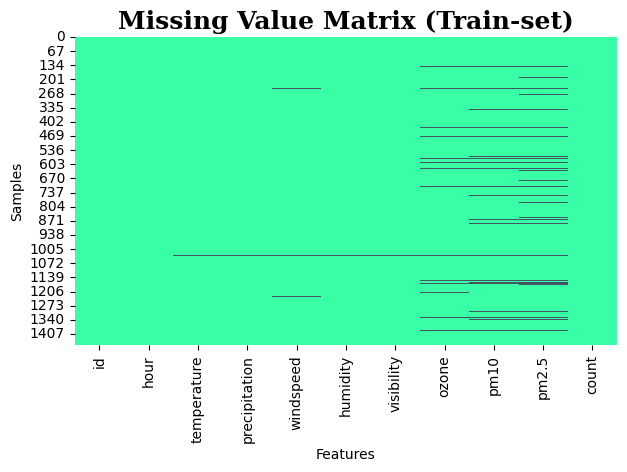

In [15]:
plt.figure(figsize = (7, 4))
sns.heatmap(train.isnull(), cbar=False, cmap = color)
plt.title("Missing Value Matrix (Train-set)", fontfamily = 'serif', fontweight = 'bold', fontsize = 18)
plt.xlabel("Features", fontsize = 10)
# plt.xticks(rotation = 0)
plt.ylabel("Samples", fontsize = 10)
plt.show()

In [16]:
train.describe()

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [17]:
train.groupby('hour').mean()

,id,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [18]:
test.isnull().sum()

id                0
hour              0
temperature       1
precipitation     1
windspeed         1
humidity          1
visibility        1
ozone            35
pm10             37
pm2.5            36
dtype: int64

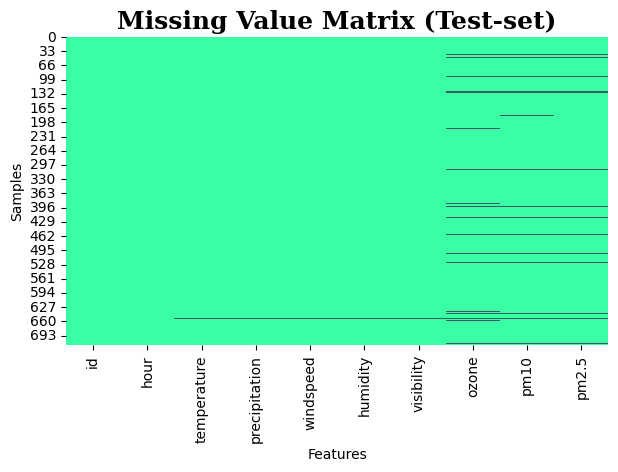

In [19]:
plt.figure(figsize = (7, 4))
sns.heatmap(test.isnull(), cbar=False, cmap = color)
plt.title("Missing Value Matrix (Test-set)", fontfamily = 'serif', fontweight = 'bold', fontsize = 18)
plt.xlabel("Features", fontsize = 10)
# plt.xticks(rotation = 0)
plt.ylabel("Samples", fontsize = 10)
plt.show()

In [20]:
test.describe()

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [21]:
test.groupby('hour').mean()

,id,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
hour,,,,,,,,,
0,984.700000,21.386667,0.033333,1.986667,63.200000,1468.100000,0.029933,34.833333,23.200000
1,1040.266667,20.986667,0.066667,1.840000,65.000000,1340.733333,NaN,NaN,NaN
2,1038.733333,20.600000,0.066667,1.823333,67.266667,1254.833333,0.029400,35.033333,23.600000
3,1125.700000,20.203333,0.033333,1.636667,68.700000,1240.500000,0.031267,34.466667,24.366667
4,1147.500000,19.853333,0.033333,1.543333,69.600000,1230.600000,0.032833,33.800000,23.633333
5,954.620690,19.634483,0.034483,1.589655,70.034483,1161.241379,0.032690,34.172414,24.310345
6,1270.633333,19.243333,0.100000,1.396667,72.333333,1107.833333,0.031633,34.666667,24.133333
7,957.466667,19.190000,0.100000,1.453333,71.900000,1080.633333,0.028100,35.966667,24.933333
8,1096.566667,19.846667,0.100000,1.446667,67.700000,1095.600000,0.025800,35.533333,24.833333


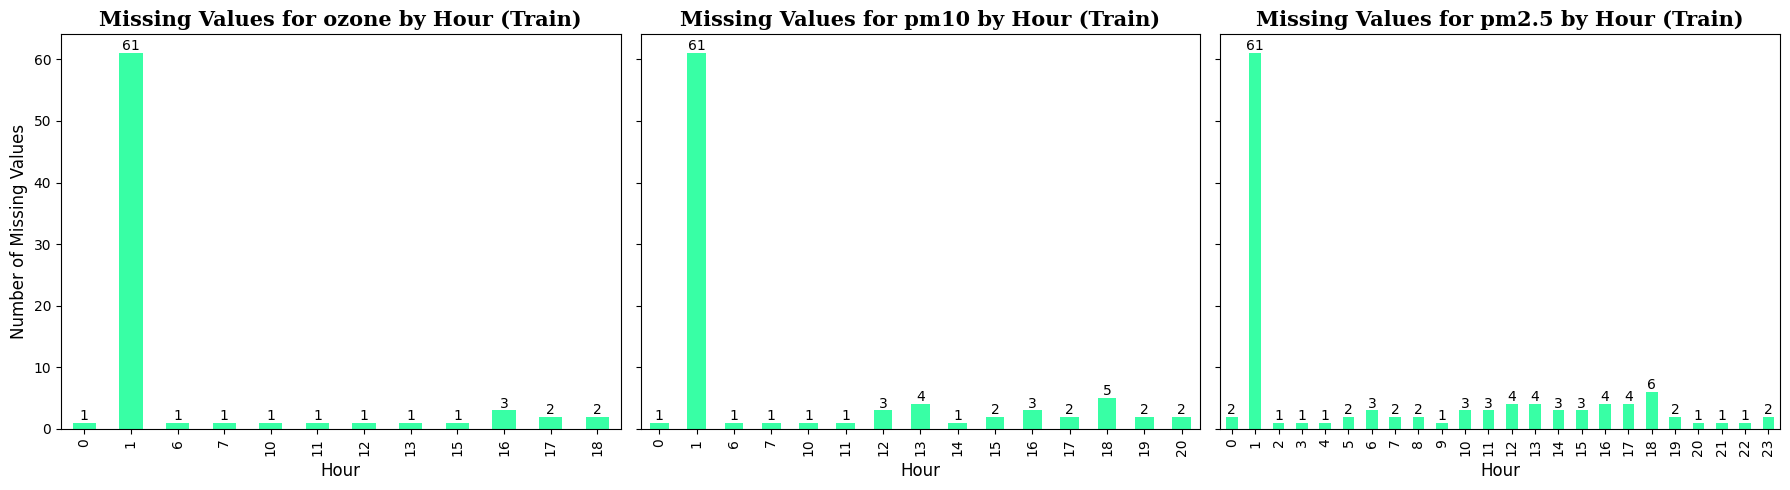

In [22]:
cols = ['ozone', 'pm10', 'pm2.5']
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, col in enumerate(cols):
    missing = train[train[col].isnull()].groupby('hour').size()

    missing.plot(kind='bar', ax = axes[i], color = color[0])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

    axes[i].set_title(f'Missing Values for {col} by Hour (Train)', fontfamily = 'serif', fontweight = 'bold', fontsize = 15)
    axes[i].set_xlabel('Hour', fontsize = 12)
    axes[i].set_ylabel('Number of Missing Values', fontsize = 12)
plt.tight_layout()
plt.show()

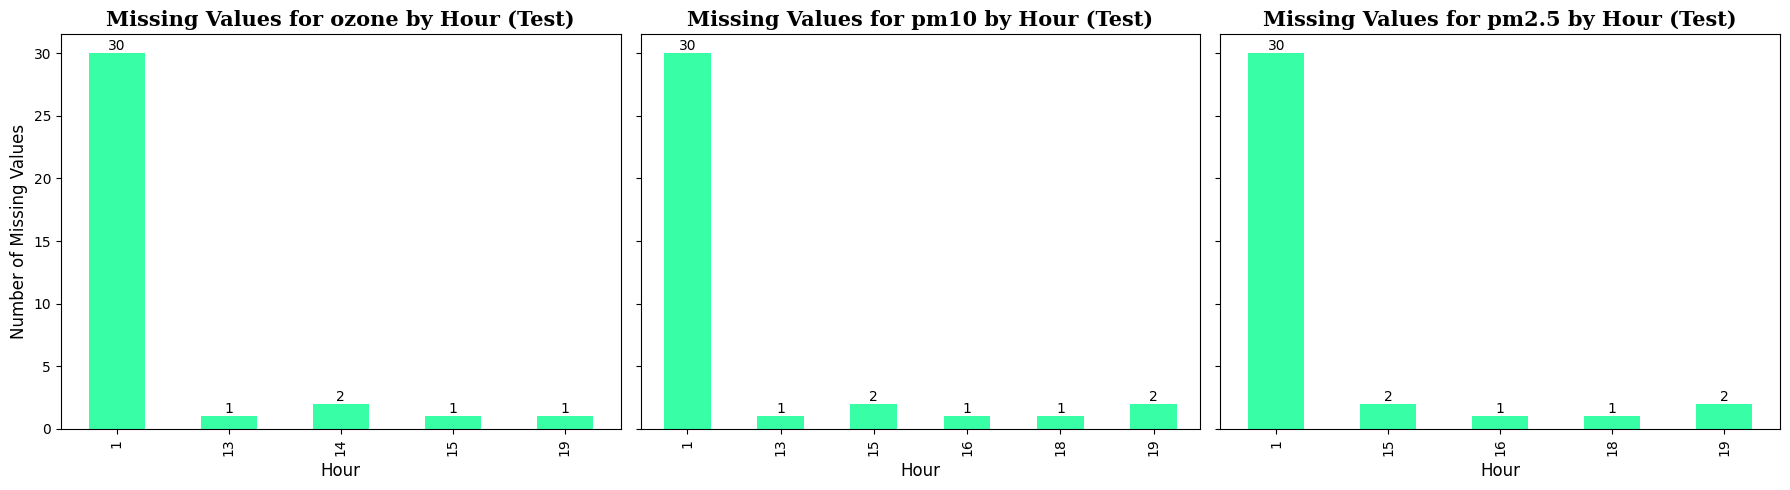

In [23]:
cols = ['ozone', 'pm10', 'pm2.5']
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, col in enumerate(cols):
    missing = test[test[col].isnull()].groupby('hour').size()

    missing.plot(kind='bar', ax = axes[i], color = color[0])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

    axes[i].set_title(f'Missing Values for {col} by Hour (Test)', fontfamily = 'serif', fontweight = 'bold', fontsize = 15)
    axes[i].set_xlabel('Hour', fontsize = 12)
    axes[i].set_ylabel('Number of Missing Values', fontsize = 12)
plt.tight_layout()
plt.show()

In [24]:
print(train['precipitation'].unique()) ; print(test['precipitation'].unique())

[ 1.  0. nan]
[ 0.  1. nan]


In [25]:
display(train.head()) ; display(test.head())

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [26]:
naCols =  ['temperature', 'precipitation', 'windspeed', 'humidity', 'visibility', 'ozone', 'pm10', 'pm2.5']

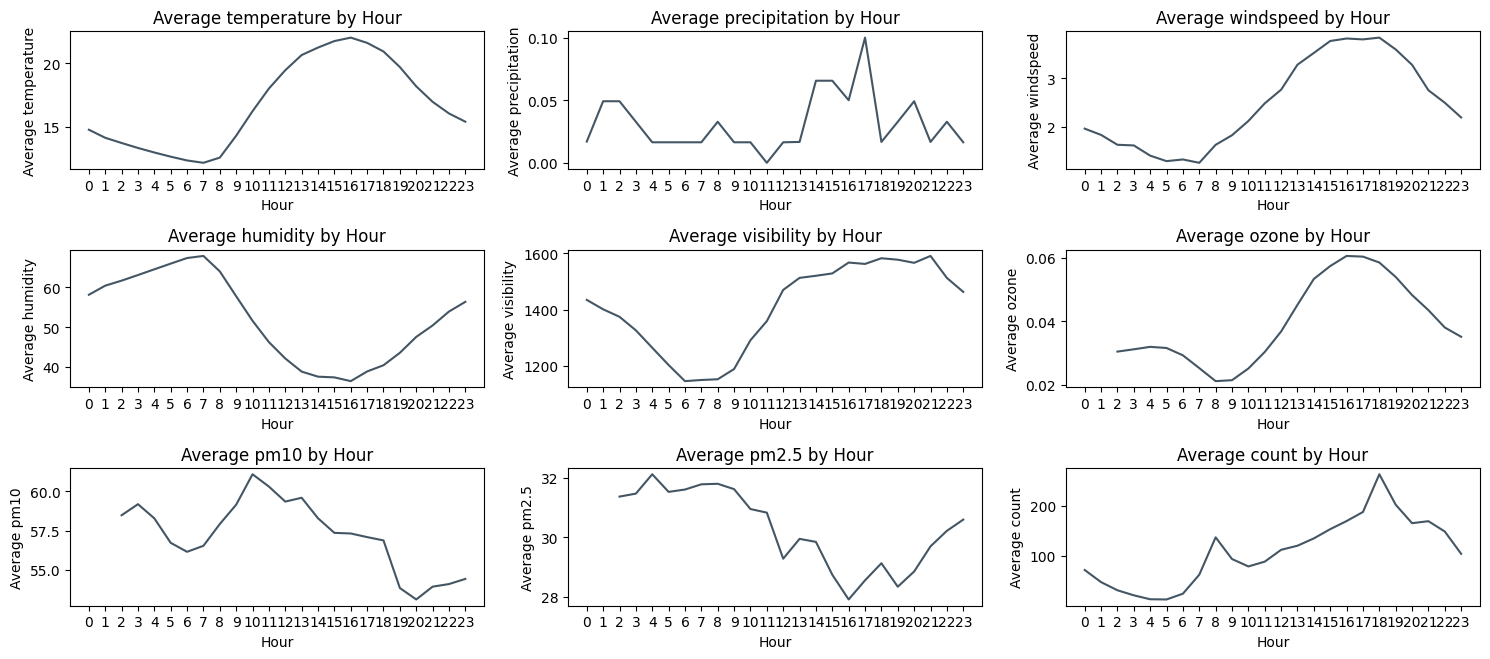

In [27]:
fig = plt.figure(figsize=(15, 15))

for i, col in enumerate(train.columns[2:]):
    ax = plt.subplot(7, 3, i+1)  
    series = train.groupby('hour')[col].mean()
    
    ax.plot(series.index, series.values, color = color[3]) 
    ax.set_title(f"Average {col} by Hour")
    ax.set_xlabel('Hour')
    ax.set_ylabel(f"Average {col}")
    ax.set_xticks(series.index)  

plt.tight_layout()
plt.show()

In [28]:
def fillNa(df, naCols):
    
    for col in naCols:
        if col == 'precipitation':
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna(df.groupby('hour')[col].transform('mean'))
        
    for hour in df['hour'].unique():
        missing = df[(df['hour'] == hour) & df[naCols].isnull().any(axis=1)]
        
        if not missing.empty:
            prev = (hour - 1) % 24
            next = (hour + 1) % 24
            
            for col in naCols:
                if df[col].isnull().any():
                    meanVal = df[df.hour.isin([prev, next])][col].mean()
                    df.loc[df.hour == 1, col] = df.loc[df.hour == 1, col].fillna(meanVal)
    df[naCols] = df[naCols].round(3)
    if col == 'ozone':
        df[col] = df[col].round(3)
    else:
        df[col] = df[col].round(0)
        
    return df

In [29]:
test = fillNa(test, naCols)
train = fillNa(train, naCols)

display(test.groupby('hour').mean())
display(train.groupby('hour').mean())

,id,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
hour,,,,,,,,,
0,984.700000,21.386667,0.033333,1.986667,63.200000,1468.100000,0.029933,34.833333,23.200000
1,1040.266667,20.986667,0.066667,1.840000,65.000000,1340.733333,0.030000,34.933000,23.000000
2,1038.733333,20.600000,0.066667,1.823333,67.266667,1254.833333,0.029400,35.033333,23.600000
3,1125.700000,20.203333,0.033333,1.636667,68.700000,1240.500000,0.031267,34.466667,24.366667
4,1147.500000,19.853333,0.033333,1.543333,69.600000,1230.600000,0.032833,33.800000,23.633333
5,954.620690,19.634483,0.034483,1.589655,70.034483,1161.241379,0.032690,34.172414,24.310345
6,1270.633333,19.243333,0.100000,1.396667,72.333333,1107.833333,0.031633,34.666667,24.133333
7,957.466667,19.190000,0.100000,1.453333,71.900000,1080.633333,0.028100,35.966667,24.933333
8,1096.566667,19.846667,0.100000,1.446667,67.700000,1095.600000,0.025800,35.533333,24.833333


,id,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788133,0.016667,1.965533,58.169483,1434.220333,0.033767,55.881350,30.983333,71.766667
1,1074.918033,14.155738,0.049180,1.836672,60.459016,1400.852459,0.032000,57.189000,31.000000,47.606557
2,1077.885246,13.747541,0.049180,1.633328,61.721311,1374.278689,0.030492,58.475410,31.360656,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.459016,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.114754,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.540984,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029311,56.150000,31.622951,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025295,56.533328,31.786885,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.803279,136.688525


In [30]:
print("Train Data Set : \n", train.isnull().sum()) ; print("\nTest Data Set : \n", test.isnull().sum())

Train Data Set : 
 id               0
hour             0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
count            0
dtype: int64

Test Data Set : 
 id               0
hour             0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
ozone            0
pm10             0
pm2.5            0
dtype: int64


In [31]:
print("Train Data Set : \n", train.isna().any()) ; print("\nTest Data Set : \n", test.isna().any())

Train Data Set : 
 id               False
hour             False
temperature      False
precipitation    False
windspeed        False
humidity         False
visibility       False
ozone            False
pm10             False
pm2.5            False
count            False
dtype: bool

Test Data Set : 
 id               False
hour             False
temperature      False
precipitation    False
windspeed        False
humidity         False
visibility       False
ozone            False
pm10             False
pm2.5            False
dtype: bool


# 2. 데이터 평가 (EDA)

In [32]:
corr = train.corr()
corr['count'].sort_values(ascending = False)

count            1.000000
hour             0.626047
temperature      0.618222
ozone            0.481216
windspeed        0.459692
visibility       0.298538
id              -0.002131
pm10            -0.111216
pm2.5           -0.133002
precipitation   -0.163580
humidity        -0.470337
Name: count, dtype: float64

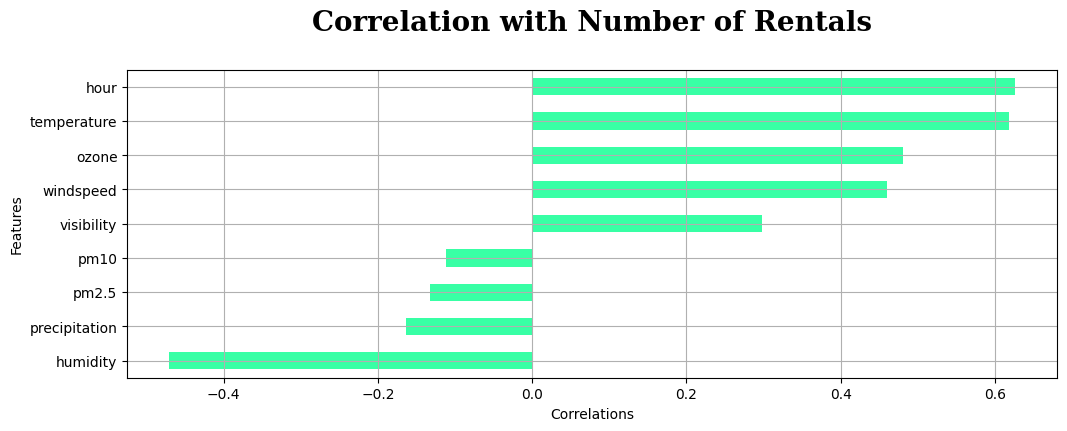

In [33]:
correlations = corr['count'].sort_values(ascending = True)
correlations = correlations[correlations != 1]
correlations = correlations[correlations.index != 'id']
correlations.plot.barh(figsize = (12,4), fontsize = 10, color = color[0], rot = 0, grid = True)
plt.title("Correlation with Number of Rentals\n", fontsize = 20, fontfamily = 'serif', fontweight = 'bold')
plt.xlabel("Correlations")
plt.ylabel("Features")
plt.show()

## 2-1. 전체 히스토그램

In [34]:
train.columns #[2:]

Index(['id', 'hour', 'temperature', 'precipitation', 'windspeed', 'humidity',
       'visibility', 'ozone', 'pm10', 'pm2.5', 'count'],
      dtype='object')

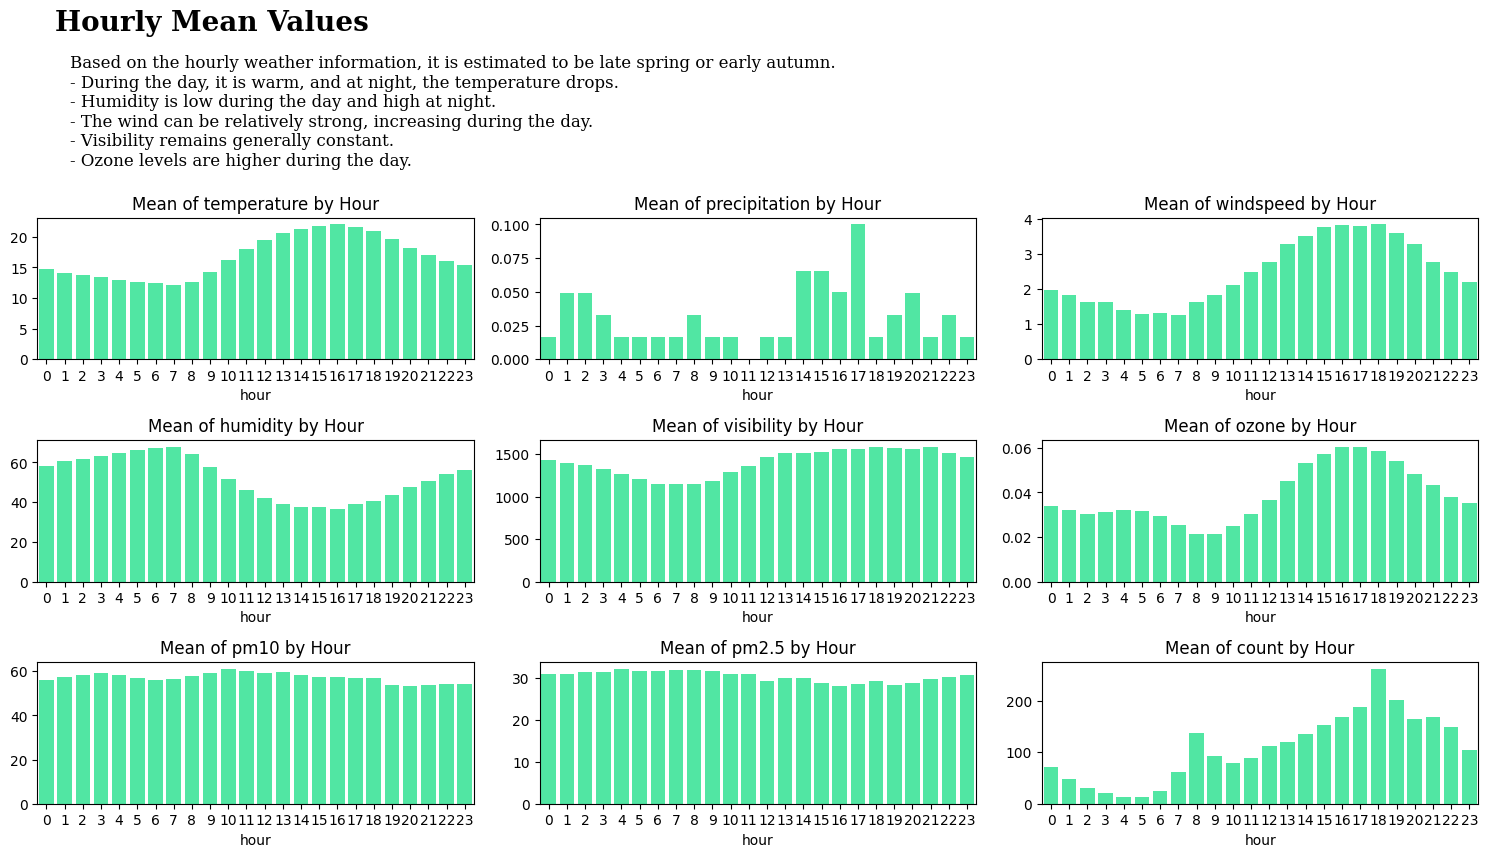

In [35]:
fig = plt.figure(figsize = (15,15))

for i, col in enumerate(train.columns[2:]):
    ax = plt.subplot(6, 3, i+1)
    grp = train.groupby('hour')[col].mean()
    # ax.plot(grp.index.astype(str), grp.values.astype, color = color[0])
    sns.barplot(x=grp.index.astype(str), y=grp.values, color=color[0])
    ax.set_title(f"Mean of {col} by Hour")

    
fig.text(0.04, 1, 'Hourly Mean Values', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.05, 0.91
         , """Based on the hourly weather information, it is estimated to be late spring or early autumn.
- During the day, it is warm, and at night, the temperature drops.
- Humidity is low during the day and high at night.
- The wind can be relatively strong, increasing during the day.
- Visibility remains generally constant.
- Ozone levels are higher during the day."""
         , fontsize=12, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.65)


# plt.tight_layout(pad=2.0)
plt.tight_layout(rect = [0, 0.03, 1, 0.90])
plt.show()

In [36]:
len(train.columns)

11

## 2-2. 시간대 별 대여 수

In [37]:
np.sort(train['hour'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

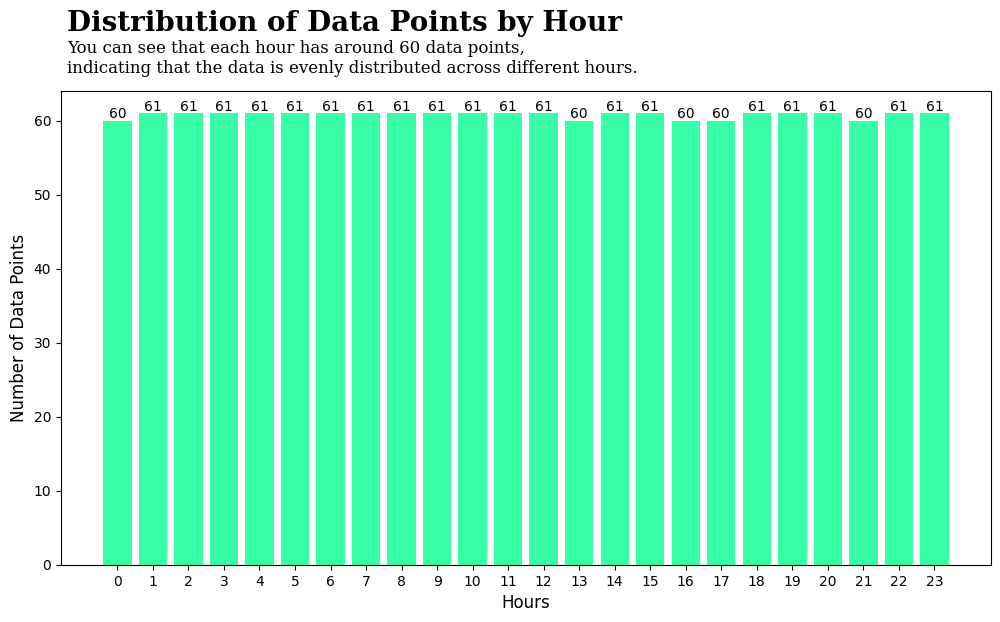

In [38]:
hours = train.groupby(['hour'])['hour'].count()

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

fig.text(0.13, 1, 'Distribution of Data Points by Hour', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.93
         , "You can see that each hour has around 60 data points, \nindicating that the data is evenly distributed across different hours."
         , fontsize=12, fontweight='light', fontfamily='serif')
fig.subplots_adjust(top=0.90)

bars = ax.bar(hours.index.astype(str), hours.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Number of Data Points', fontsize = 12)
plt.show()

In [39]:
hours = train.groupby('hour')['count'].sum()
hoursRatio = hours / hours.sum() * 100
hoursRatio = hoursRatio.sort_values(ascending = False)
top3 = hoursRatio.head(3)
# print(hours)
# print(hoursRatio)
# print(top3)

In [40]:
hoursRatio.index

Int64Index([18, 19, 17, 16, 21, 20, 15, 22,  8, 14, 13, 12, 23,  9, 11, 10,  0,
             7,  1,  2,  6,  3,  4,  5],
           dtype='int64', name='hour')

In [41]:
# top8 = hoursRatio.head(8).iloc[3:8]

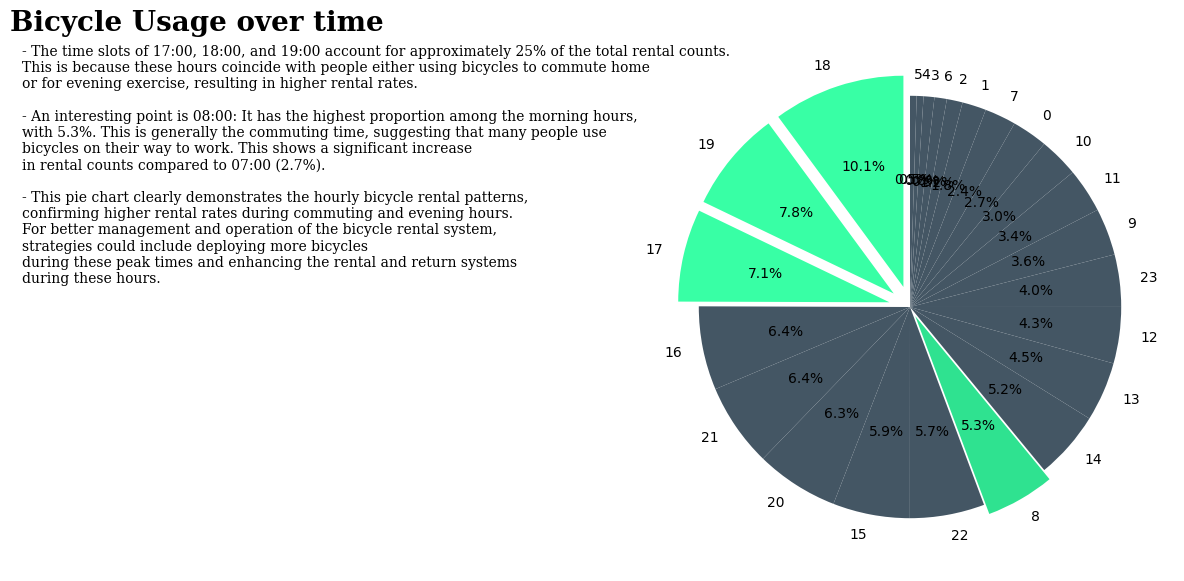

In [42]:
explode = [0.1 if hour in top3.index else 0.05 if hour == 8 else 0 for hour in hoursRatio.index]
colorCode = [color[0] if hour in top3.index else color[1] if hour == 8 else color[3] for hour in hoursRatio.index]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

fig.text(0.05, 1, 'Bicycle Usage over time', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.58, 
f"""
- The time slots of 17:00, 18:00, and 19:00 account for approximately {top3.values[0]+top3.values[1]+top3.values[2]:.0f}% of the total rental counts. 
This is because these hours coincide with people either using bicycles to commute home 
or for evening exercise, resulting in higher rental rates.

- An interesting point is 08:00: It has the highest proportion among the morning hours, 
with 5.3%. This is generally the commuting time, suggesting that many people use 
bicycles on their way to work. This shows a significant increase 
in rental counts compared to 07:00 (2.7%).

- This pie chart clearly demonstrates the hourly bicycle rental patterns, 
confirming higher rental rates during commuting and evening hours. 
For better management and operation of the bicycle rental system, 
strategies could include deploying more bicycles
during these peak times and enhancing the rental and return systems 
during these hours."""
, fontsize=10, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.80)
fig.subplots_adjust(left = 0, right = 1.6, top = 0.98, bottom = 0.1)

ax.pie(hoursRatio, labels = hoursRatio.index, autopct='%1.1f%%', # counterclock = False,
        startangle=90, textprops=dict(color="black"), explode=explode, colors = colorCode)

plt.show()


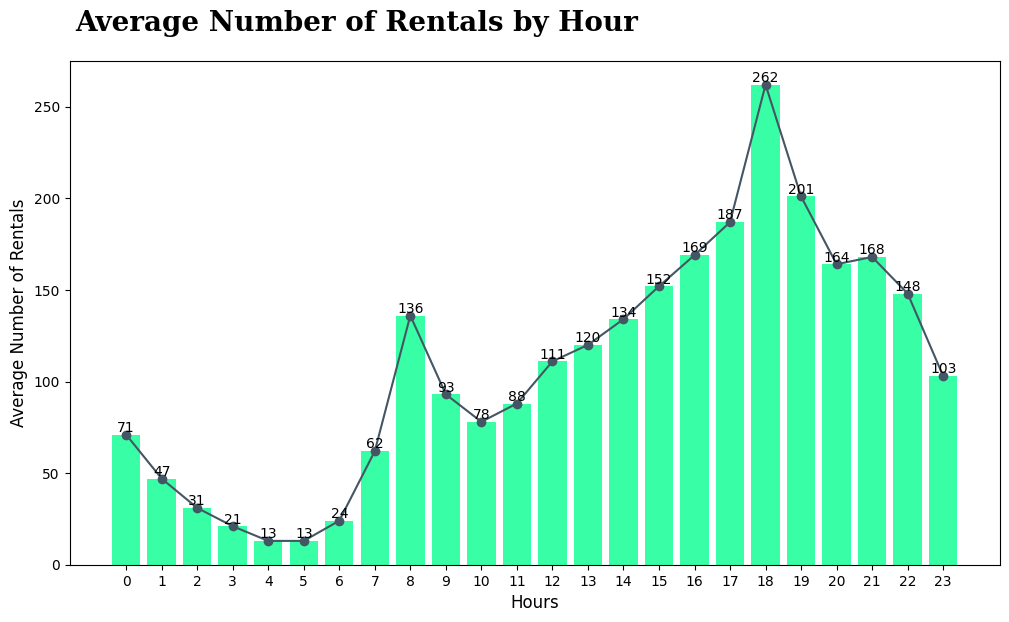

In [43]:
hours = train.groupby('hour')['count'].mean()

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

fig.text(0.13, 1, 'Average Number of Rentals by Hour', fontsize=20, fontweight='bold', fontfamily='serif')
fig.subplots_adjust(top=0.95)

bars = ax.bar(hours.index.astype(str), hours.values.astype(int), color = color[0])
line = ax.plot(hours.index.astype(str), hours.values.astype(int), color= color[-1], marker='o')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Average Number of Rentals', fontsize = 12)
plt.show()

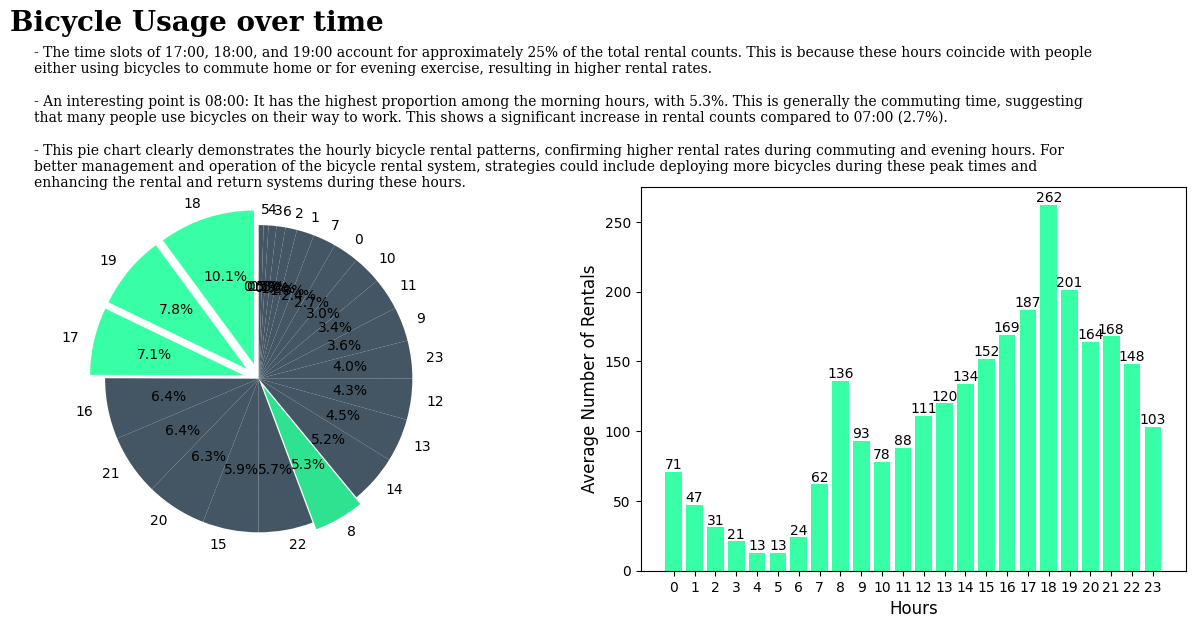

In [44]:
hours = train.groupby('hour')['count'].mean()

explode = [0.1 if hour in top3.index else 0.05 if hour == 8 else 0 for hour in hoursRatio.index]
colorCode = [color[0] if hour in top3.index else color[1] if hour == 8 else color[3] for hour in hoursRatio.index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.text(0.02, 1, 'Bicycle Usage over time', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.04, 0.74, 
f"""
- The time slots of 17:00, 18:00, and 19:00 account for approximately {top3.values[0]+top3.values[1]+top3.values[2]:.0f}% of the total rental counts. This is because these hours coincide with people 
either using bicycles to commute home or for evening exercise, resulting in higher rental rates.

- An interesting point is 08:00: It has the highest proportion among the morning hours, with 5.3%. This is generally the commuting time, suggesting 
that many people use bicycles on their way to work. This shows a significant increase in rental counts compared to 07:00 (2.7%).

- This pie chart clearly demonstrates the hourly bicycle rental patterns, confirming higher rental rates during commuting and evening hours. For 
better management and operation of the bicycle rental system, strategies could include deploying more bicycles during these peak times and 
enhancing the rental and return systems during these hours."""
, fontsize=10, fontweight='light', fontfamily='serif')
fig.subplots_adjust(left = 0, right = 1, top = 0.74, bottom = 0.1)
ax1.pie(hoursRatio, labels = hoursRatio.index, autopct='%1.1f%%', # counterclock = False,
        startangle=90, textprops=dict(color="black"), explode=explode, colors = colorCode)

bars = ax2.bar(hours.index.astype(str), hours.values.astype(int), color = color[0])

for p in ax2.patches:
# for p in bars:
    height = p.get_height()
    ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Average Number of Rentals', fontsize = 12)
plt.show()


## 2-3. 기온 별 자전거 대여 수

In [45]:
display(train.head())
display(test.head())

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [46]:
# 기온별 대여 횟수를 알기 위해 기온을 정수로 변환
train['temperature'] = train['temperature'].astype(int)
test['temperature'] = test['temperature'].astype(int)

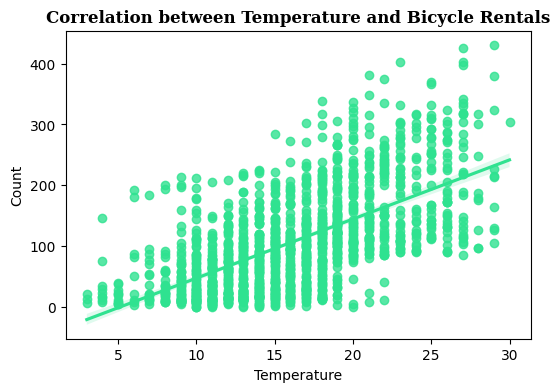

In [47]:
plt.figure(figsize=(6, 4))
sns.regplot(x = 'temperature', y = 'count', data = train, color = color[1])
plt.title("Correlation between Temperature and Bicycle Rentals", fontfamily = 'serif', fontweight = 'bold', fontsize = 12)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

- As the temperature increases, there is a tendency for the number of bicycle rentals to increase. This suggests that people tend to rent more bicycles when the weather is warm.
- The number of bicycle rentals is also low when the temperature is low (below approximately 5 degrees) and when it is high (above approximately 25 degrees). This indicates that bicycle rentals may decrease during very cold or very hot weather.
- Overall, there is a positive correlation between temperature and the number of bicycle rentals. This indicates that as the temperature rises, the number of bicycle rentals tends to increase.
- 기온이 상승할수록 자전거 대여 수가 증가하는 경향이 있습니다. 날씨가 따뜻할 때 사람들이 더 많이 자전거를 대여하는 경향이 있음을 시사합니다.
- 기온이 낮은 경우(약 5도 이하)와 기온이 높은 경우(약 25도 이상)에도 자전거 대여 수가 낮은 편입니다. 매우 추운 날씨나 매우 더운 날씨에는 자전거 대여가 줄어들 수 있음을 보여줍니다.
- 전반적으로, 기온과 자전거 대여 수는 양의 상관관계를 보입니다. 이는 기온이 오를수록 자전거 대여 수가 증가하는 경향이 있음을 나타냅니다.

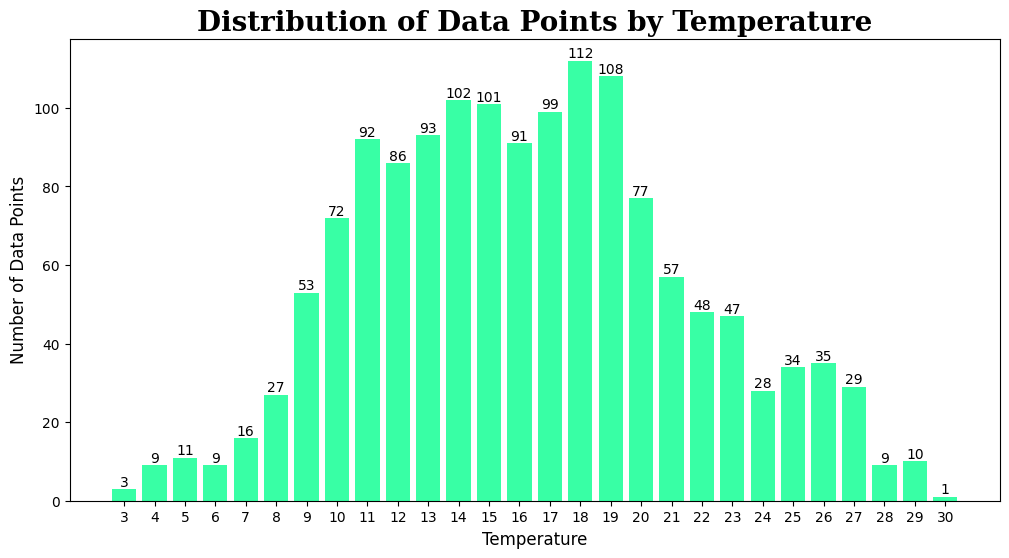

In [48]:
temperature = train.groupby(['temperature'])['temperature'].count()

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
bars = ax.bar(temperature.index.astype(str), temperature.values, color = color[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
plt.title('Distribution of Data Points by Temperature', fontsize=20, fontweight='bold', fontfamily='serif')
plt.xlabel('Temperature', fontsize = 12)
plt.ylabel('Number of Data Points', fontsize = 12)
plt.show()

기온 컬럼은 시간 컬럼과 다르게 데이터가 균등하지 않기 때문에 기온별 총 대여 횟수가 아닌 평균 대여 횟수를 보는 건 분석에 적절하지 않다.

In [49]:
temperature = train.groupby('temperature')['count'].sum().astype(int)
temperRatio = temperature / temperature.sum() * 100
top5 = temperRatio.sort_values(ascending = False).head()
# temperRatio.sort_values(ascending = False)
top10 = temperRatio.sort_values(ascending = False).head(10).iloc[5:10]
print(top5)
print(top10)

temperature
19    9.404397
18    8.108262
20    7.969368
17    6.050103
21    5.926361
Name: count, dtype: float64
temperature
23    5.688347
15    5.657411
22    5.387199
16    5.094890
14    5.019761
Name: count, dtype: float64


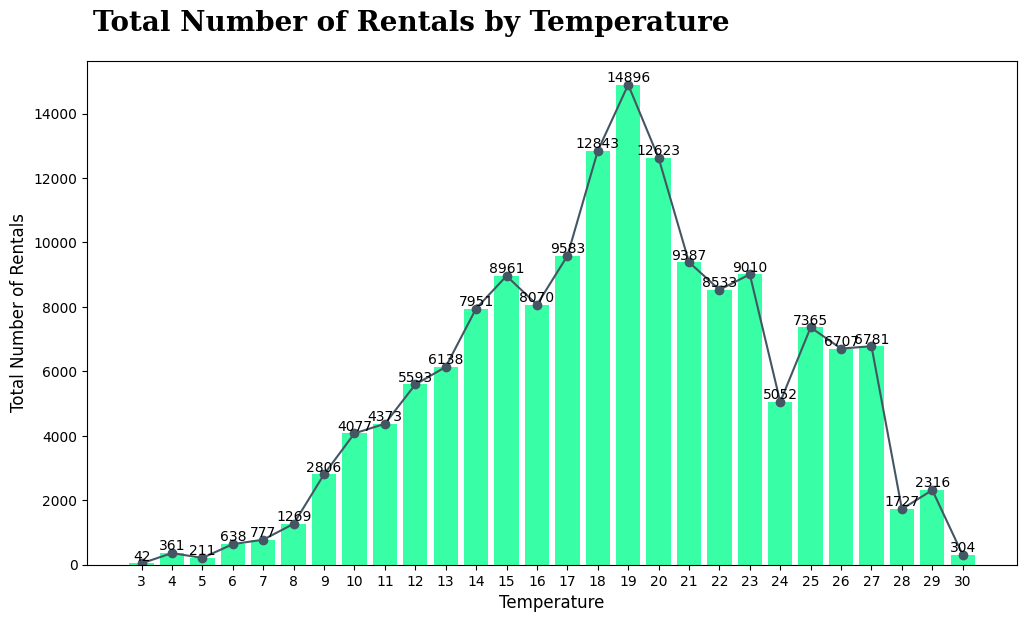

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))

fig.text(0.13, 1, 'Total Number of Rentals by Temperature', fontsize=20, fontweight='bold', fontfamily='serif')
fig.subplots_adjust(top=0.95)

bars = ax.bar(temperature.index.astype(str), temperature.values.astype(int), color = color[0])
line = ax.plot(temperature.index.astype(str), temperature.values.astype(int), color= color[-1], marker='o')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Temperature', fontsize = 12)
plt.ylabel('Total Number of Rentals', fontsize = 12)
plt.show()

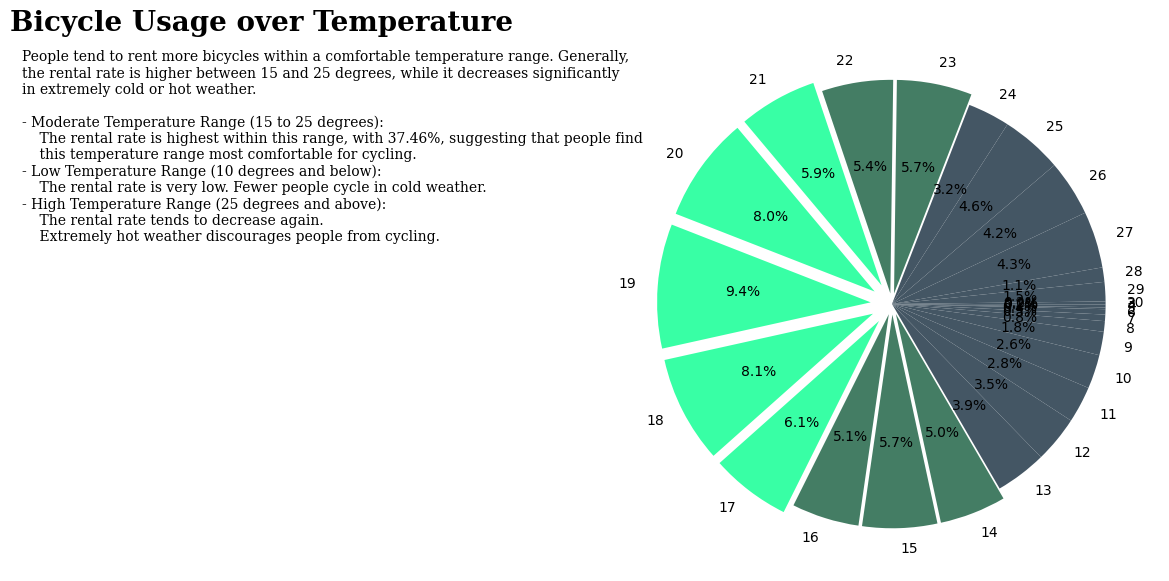

In [51]:
explode = [0.1 if temperature in top5.index else 0.05 if temperature in top10.index else 0 for temperature in temperRatio.index]
colorCode = [color[0] if temperature in top5.index else color[2] if temperature in top10.index else color[3] for temperature in temperRatio.index]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

fig.text(0.13, 1, 'Bicycle Usage over Temperature', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.14, 0.65, 
f"""People tend to rent more bicycles within a comfortable temperature range. Generally, 
the rental rate is higher between 15 and 25 degrees, while it decreases significantly 
in extremely cold or hot weather.

- Moderate Temperature Range (15 to 25 degrees): 
    The rental rate is highest within this range, with {top5.values[0]+top5.values[1]+top5.values[2]+top5.values[3]+top5.values[4]:.2f}%, suggesting that people find 
    this temperature range most comfortable for cycling.
- Low Temperature Range (10 degrees and below): 
    The rental rate is very low. Fewer people cycle in cold weather.
- High Temperature Range (25 degrees and above): 
    The rental rate tends to decrease again. 
    Extremely hot weather discourages people from cycling."""
         , fontsize=10, fontweight='light', fontfamily='serif')
# fig.subplots_adjust(top=0.80)

fig.subplots_adjust(left = 0.13, right = 1.6, top = 0.99, bottom = 0.1)

ax.pie(temperRatio, labels = temperRatio.index, autopct='%1.1f%%', counterclock = False,
        startangle=0, textprops=dict(color="black"), explode=explode, colors = colorCode)

plt.show()

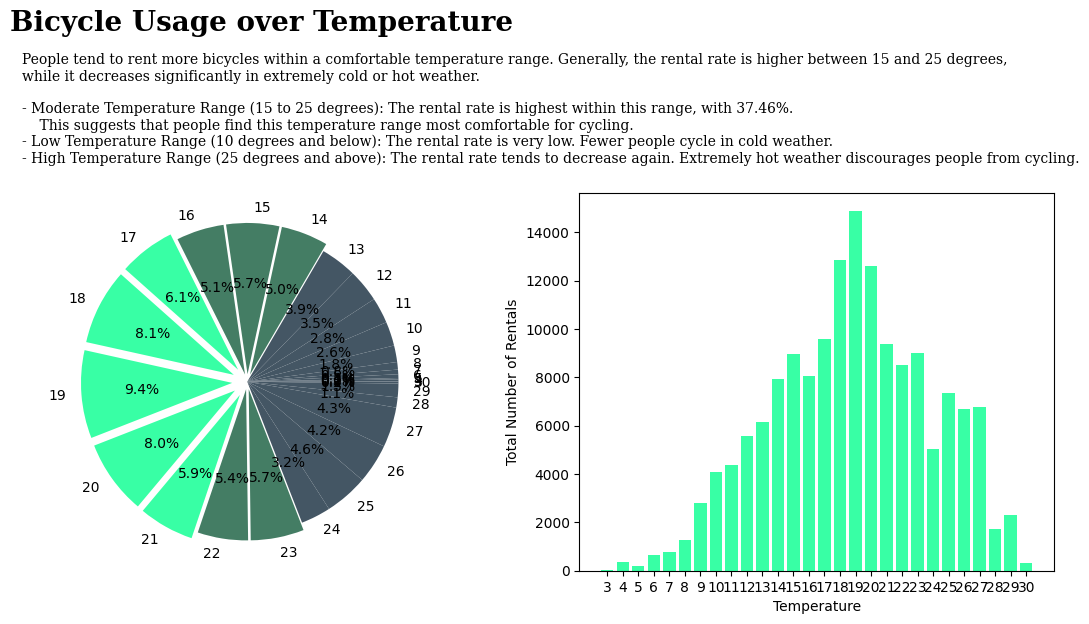

In [52]:
explode = [0.1 if temperature in top5.index else 0.05 if temperature in top10.index else 0 for temperature in temperRatio.index]
colorCode = [color[0] if temperature in top5.index else color[2] if temperature in top10.index else color[3] for temperature in temperRatio.index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.text(0.13, 1, 'Bicycle Usage over Temperature', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.14, 0.78, 
f"""People tend to rent more bicycles within a comfortable temperature range. Generally, the rental rate is higher between 15 and 25 degrees, 
while it decreases significantly in extremely cold or hot weather.

- Moderate Temperature Range (15 to 25 degrees): The rental rate is highest within this range, with {top5.values[0]+top5.values[1]+top5.values[2]+top5.values[3]+top5.values[4]:.2f}%.
    This suggests that people find this temperature range most comfortable for cycling.
- Low Temperature Range (10 degrees and below): The rental rate is very low. Fewer people cycle in cold weather.
- High Temperature Range (25 degrees and above): The rental rate tends to decrease again. Extremely hot weather discourages people from cycling."""
, fontsize=10, fontweight='light', fontfamily='serif')
fig.subplots_adjust(left = 0.13, right = 1, top = 0.73, bottom = 0.1)
ax1.pie(temperRatio, labels = temperRatio.index, autopct='%1.1f%%', # counterclock = False,
        startangle=0, textprops=dict(color="black"), explode=explode, colors = colorCode)

bars = ax2.bar(temperature.index.astype(str), temperature.values.astype(int), color = color[0])

# for p in ax2.patches:
# # for p in bars:
#     height = p.get_height()
#     ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 

plt.xlabel('Temperature', fontsize = 10)
plt.ylabel('Total Number of Rentals', fontsize = 10)
plt.show()


사람들이 자전거를 타기에 적당한 온도 범위에서 대여가 많이 이루어집니다. 대체로 15도에서 25도 사이의 기온에서 자전거 대여 비율이 높으며, 너무 춥거나 너무 더운 날씨에서는 대여 비율이 낮아지는 경향을 확인할 수 있습니다.
- 중간 기온대(15도에서 25도 사이): 이 구간에서 자전거 대여 비율이 가장 높습니다. 이는 사람들이 일반적으로 자전거를 타기에 편안한 온도대임을 예상할 수 있습니다.
- 낮은 기온대(10도 이하): 자전거 대여 비율이 매우 낮습니다. 추운 날씨에서는 자전거를 타는 사람들이 적습니다.
- 높은 기온대(25도 이상): 대여 비율이 다시 낮아지는 경향이 있습니다. 매우 더운 날씨에서는 자전거를 타는 사람들이 줄어듭니다.

## 2-4. 기온과 습도 (불쾌지수)에 따른 자전거 대여 수

## 2-5. 미세먼지 수준 별 대여 수

In [53]:
pmDF = train[['pm10', 'pm2.5', 'count']]
pmDF.head()

,pm10,pm2.5,count
0,76.0,33.0,49.0
1,73.0,40.0,159.0
2,32.0,19.0,26.0
3,75.0,64.0,57.0
4,27.0,11.0,431.0


              pm10        pm2.5        count
count  1459.000000  1459.000000  1459.000000
mean     57.173605    30.345442   108.563400
std      30.776180    14.113684    82.631733
min       9.000000     8.000000     1.000000
25%      37.000000    21.000000    37.000000
50%      53.000000    28.000000    96.000000
75%      68.000000    36.000000   150.000000
max     269.000000    90.000000   431.000000


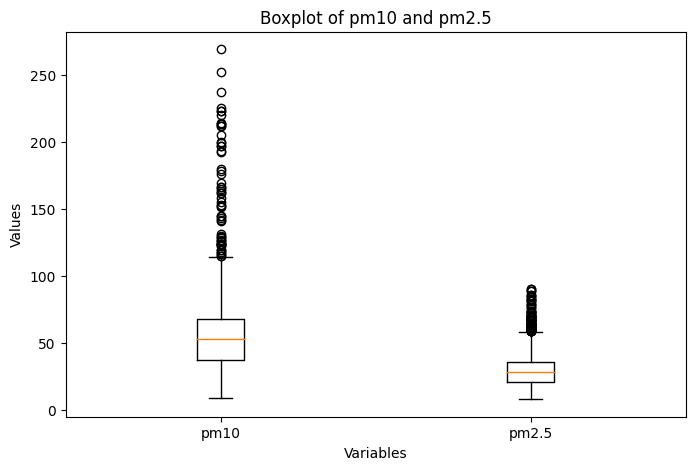

In [54]:
print(pmDF.describe())
plt.figure(figsize =(8,5))
plt.boxplot([pmDF['pm10'], pmDF['pm2.5']], labels = ['pm10', 'pm2.5'])
plt.title('Boxplot of pm10 and pm2.5')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

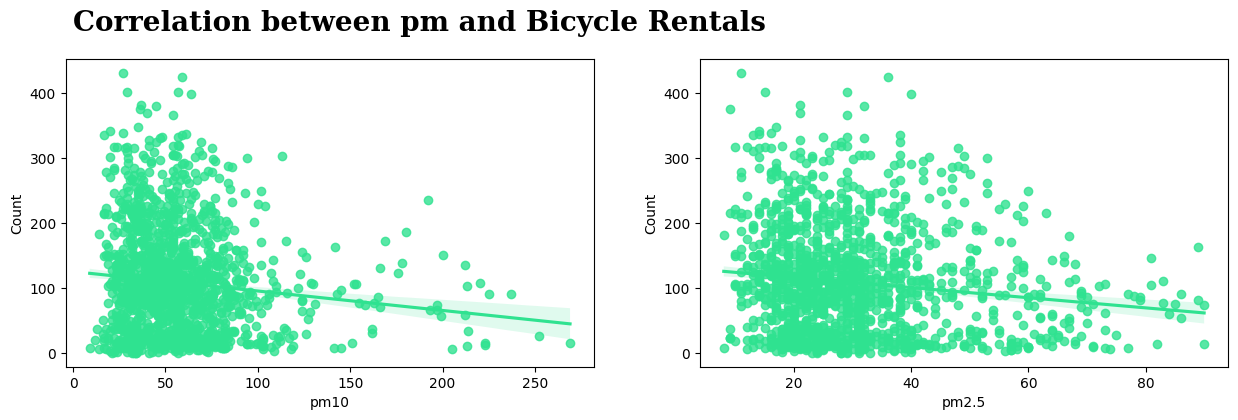

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

sns.regplot(x = 'pm10', y = 'count', data = pmDF, color = color[1], ax = ax1)
fig.text(0.13, 0.95, "Correlation between pm and Bicycle Rentals", fontfamily = 'serif', fontweight = 'bold', fontsize = 20)
# fig.subplots_adjust(top=0.92)
# fig.subplots_adjust(left = 0.13, right = 1, top = 0.92, bottom = 0.1)
ax1.set_xlabel("pm10")
ax1.set_ylabel("Count")

sns.regplot(x = 'pm2.5', y = 'count', data = pmDF, color = color[1], ax = ax2)
ax2.set_xlabel("pm2.5")
ax2.set_ylabel("Count")

# plt.tight_layout()
plt.show()

In [56]:
# len(train['pm10'].unique())
# len(train['pm2.5'].unique())
train['pm10'].sort_values()

1245      9.0
394      12.0
68       13.0
1137     14.0
10       14.0
        ...  
617     223.0
1061    225.0
233     237.0
1263    252.0
120     269.0
Name: pm10, Length: 1459, dtype: float64

**미세먼지 농도 범위를 정의하기**


1. 미세먼지 (PM10)
- Good (좋음): 미세먼지 농도가 0 ~ 30 μg/m³
- Not Bad (보통): 미세먼지 농도가 31 ~ 80 μg/m³
- Bad (나쁨): 미세먼지 농도가 81 ~ 150 μg/m³
- Very Bad (매우 나쁨): 미세먼지 농도가 151 μg/m³ 이상

2. 초미세먼지(PM2.5)
- Good (좋음): 미세먼지 농도가 0 ~ 15 μg/m³
- Not Bad (보통): 미세먼지 농도가 16 ~ 35 μg/m³
- Bad (나쁨): 미세먼지 농도가 36 ~ 75 μg/m³
- Very Bad (매우 나쁨): 미세먼지 농도가 76 μg/m³ 이상


In [57]:
train['pm10'] = train['pm10'].apply(lambda x: 
                                'Very bad' if x >= 151
                                else 'Bad' if x >= 81
                                else 'Not bad' if x >= 31 
                                else 'Good')
train['pm2.5'] = train['pm2.5'].apply(lambda x: 
                                'Very bad' if x >= 76
                                else 'Bad' if x >= 36
                                else 'Not bad' if x >= 16 
                                else 'Good')

In [58]:
pmDF = train[['pm10', 'pm2.5', 'count']]
pmDF.head()

,pm10,pm2.5,count
0,Not bad,Not bad,49.0
1,Not bad,Bad,159.0
2,Not bad,Not bad,26.0
3,Not bad,Bad,57.0
4,Good,Good,431.0


In [59]:
pmGrouped = pmDF.groupby(['pm10', 'pm2.5'])['count'].sum().reset_index()
# pmGrouped = pmDF.groupbu(['pm10', 'pm2.5']).agg({'count': 'sum'}).reset_index()
pmGrouped

,pm10,pm2.5,count
0,Bad,Bad,9234.0
1,Bad,Good,42.0
2,Bad,Not bad,4289.0
3,Bad,Very bad,1427.0
4,Good,Good,8621.0
5,Good,Not bad,14038.0
6,Not bad,Bad,26352.0
7,Not bad,Good,8025.0
8,Not bad,Not bad,83566.0
9,Very bad,Bad,1369.0


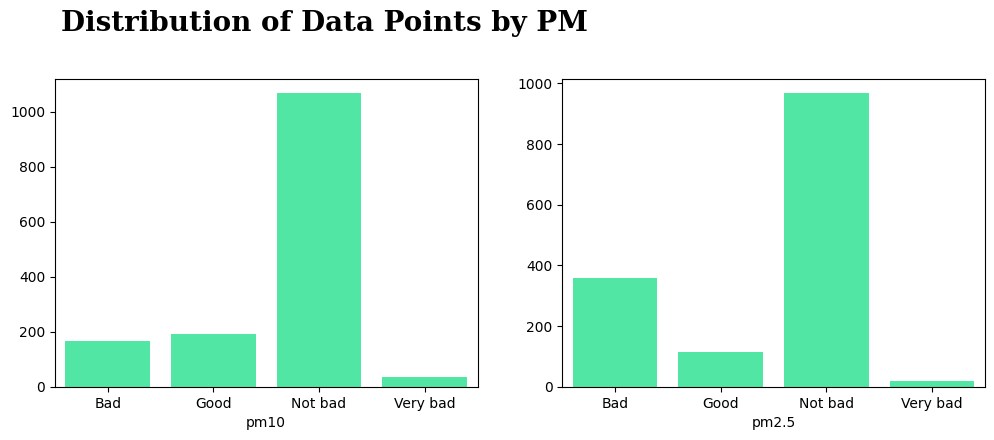

In [60]:
fig = plt.figure(figsize = (12, 4))

for i, pm in enumerate(pmDF.columns[:2]):
    ax = plt.subplot(1, 2, i+1)
    grp = pmDF.groupby(pm)[pm].count()
    sns.barplot(x = grp.index, y = grp.values, color = color[0])
    
fig.text(0.13, 1, 'Distribution of Data Points by PM', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

plt.show()


In [61]:
pm10Group = train.groupby(['pm10', 'pm2.5'])['count'].sum().unstack() # .fillna(0).astype(int)
pm2Group = train.groupby(['pm2.5', 'pm10'])['count'].sum().unstack() # .fillna(0).astype(int)

display(pm10Group, pm2Group)

pm2.5,Bad,Good,Not bad,Very bad
pm10,,,,
Bad,9234.0,42.0,4289.0,1427.0
Good,NaN,8621.0,14038.0,NaN
Not bad,26352.0,8025.0,83566.0,NaN
Very bad,1369.0,74.0,1357.0,NaN


pm10,Bad,Good,Not bad,Very bad
pm2.5,,,,
Bad,9234.0,NaN,26352.0,1369.0
Good,42.0,8621.0,8025.0,74.0
Not bad,4289.0,14038.0,83566.0,1357.0
Very bad,1427.0,NaN,NaN,NaN


In [62]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
# fig.text(0.13, 0.95, "Number of Bicycle Rentals by PM10 X PM2.5", fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
# fig.subplots_adjust(top = 0.93)

# # pm10으로 그룹화 -> pm2.5 스택 

# for key, val in pmGrouped.groupby(['pm10']):
#     ax1.bar(val['pm2.5'], val['count'], label = key)
# for p in ax1.patches:
#     height = p.get_height()
#     ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize = 8) 
# ax1.set_xlabel("pm10", fontsize = 10)
# ax1.set_ylabel("Total Number of Rentals", fontsize = 10)
# ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 8)
# ax1.legend(title='pm2.5')

# # pm2.5로 그룹화 -> pm10 스택
# for key, val in pmGrouped.groupby(['pm2.5']):
#     ax2.bar(val['pm10'], val['count'], label = key)
# for p in ax2.patches:
#     height = p.get_height()
#     ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize = 8) 
# # ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0)
# ax2.set_xlabel("pm2.5", fontsize = 10)
# ax2.set_ylabel("Total Number of Rentals", fontsize = 10)
# ax2.set_yticklabels(ax1.get_yticklabels(), fontsize = 8)
# ax2.legend(title='pm10')

# # ax1.set_facecolor('white')
# # ax2.set_facecolor('white')
# # ax1.grid(False)
# # ax2.grid(False)

# plt.show()

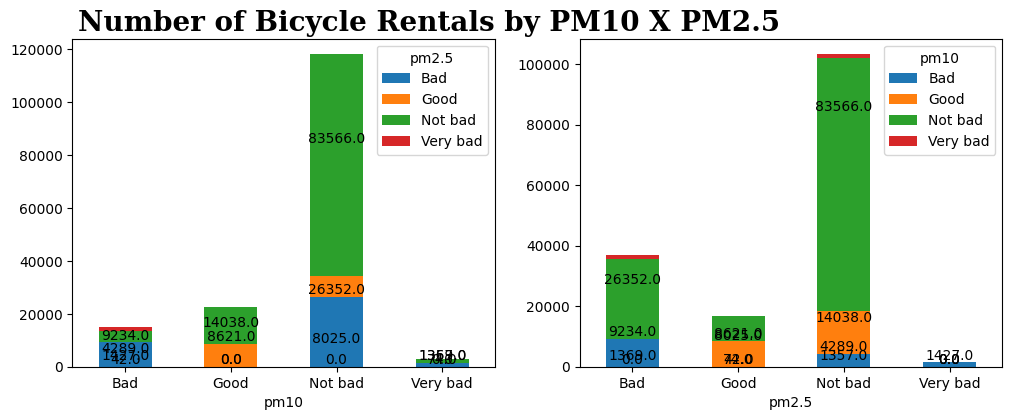

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.text(0.13, 0.95, "Number of Bicycle Rentals by PM10 X PM2.5", fontsize = 20, fontweight = 'bold', fontfamily = 'serif')
fig.subplots_adjust(top = 0.93)

# pm10으로 그룹화 -> pm2.5 스택 

pm10Group.plot(kind = 'bar', stacked = True, ax=ax1) #, color = color)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)

# pm2.5로 그룹화 -> pm10 스택
pm2Group.plot(kind = 'bar', stacked = True, ax=ax2) #, color = color)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points') 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0)
plt.show()

보기 좋지가 않군요

In [64]:
pmGrouped

,pm10,pm2.5,count
0,Bad,Bad,9234.0
1,Bad,Good,42.0
2,Bad,Not bad,4289.0
3,Bad,Very bad,1427.0
4,Good,Good,8621.0
5,Good,Not bad,14038.0
6,Not bad,Bad,26352.0
7,Not bad,Good,8025.0
8,Not bad,Not bad,83566.0
9,Very bad,Bad,1369.0


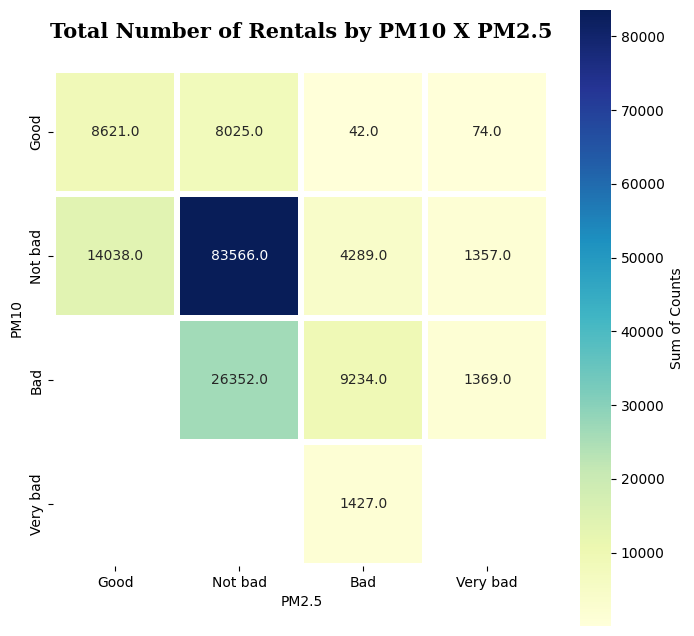

In [65]:
pmOrder = ['Good', 'Not bad', 'Bad', 'Very bad']


plt.figure(figsize=(8, 8))
# sns.set(font_scale=1.2)
sns.heatmap(pm2Group.loc[pmOrder, pmOrder], # train.pivot_table(values='count', index=['pm2.5'], columns=['pm10'], aggfunc=np.sum).loc[pmOrder, pmOrder],
            linewidth=4, 
            # ax=ax, 
            square=True,
            annot=True, 
            fmt=".1f", 
            cmap="YlGnBu",
            # cmap = color,
            cbar_kws={'label': 'Sum of Counts'}
           )
plt.title('Total Number of Rentals by PM10 X PM2.5\n', fontsize = 15, fontfamily = 'serif', fontweight = 'bold')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
# plt.tight_layout()
plt.show()

1. PM10과 PM2.5가 모두 Good일 때: 데이터에서 PM10이 Good일 때의 전체 자전거 대여량은 11.3%로, 생각보다 낮습니다. PM10이 Good일 때의 자전거 대여량은 전반적으로 낮은 편입니다.
2. PM10과 PM2.5가 모두 Not bad일 때:
- 자전거 대여량이 가장 높습니다. 이 조합에서 자전거 대여가 매우 활발하게 이루어지고 있습니다.
- 이는 공기 질이 상대적으로 괜찮을 때 사람들이 자전거를 많이 대여하는 경향이 있음을 나타낼 수 있습니다. 하지만, 이 조건 자체가 자전거 대여를 잘 예측할 수 있는 조건이라고 보기는 어렵습니다. 데이터에 포함되지 않은 다른 조건들(예: 날짜, 다른 날씨 조건 등)이 더 중요한 영향을 미칠 수 있습니다.

##### 결론
- PM10과 PM2.5가 Good일 때는 자전거 대여량에 큰 영향을 미치지 못했으며, PM10이 Good일 때의 자전거 대여량은 전체의 약 11.3%로 낮은 편입니다.
- PM10과 PM2.5가 모두 Not bad일 때 가장 높은 대여량을 보이고 있습니다. 이는 공기 질이 상대적으로 괜찮을 때 사람들이 자전거를 많이 대여하는 경향을 나타낼 수 있지만, 자전거 대여를 잘 예측할 수 있는 조건이라고 보기는 어렵습니다. 데이터에 포함되지 않은 다른 조건들(예: 날짜, 다른 날씨 조건 등)이 더 중요할 수 있습니다.

- 미세먼지 pm10 기준, 공기의 질이 보통(not bad)일 때와 좋을(good) 때에 비해 나쁜 수준(bad, very bad)일 때 자전거 대여 수가 급격히 감소하는 경향성.
- 초미세먼지 pm2.5 기준, 공기의 질이 나쁠수록 (Not Bad -> Bad -> Very Bad) 자전거 대여 수가 급격히 감소하는 경향성.
    - 초미세먼지 수준이 보통 (not bad)일 때 가장 많은 대여 발생
    - \[!\] 초미세먼지 수준이 나쁠 (bad) 때 좋을 때보다 더 많은 대여 발생

- 미세먼지 농도와 자전거 대여 수 간에는 일정한 상관관계가 있을 수 있음.
- 특히 공기 질이 매우 나쁠 때 자전거 대여 수가 두드러지게 감소하는 경향을 확인할 수 있음.
    - 그러나 초미세먼지 수준이 나쁜 수준일 때에도 좋은 수준일 때보다 약 2배 가량의 높은 대여를 확인할 수 있음.
    - 미세먼지 농도가 자전거 대여에 "극적인" 영향을 미친다고 단정하기는 어려움.
    - 상황에 따라 영향력의 정도가 다를 수 있으며, 추가적인 데이터 분석과 다른 환경적, 계절적 요인 고려 필요.

# 크크루핖퐁

## 2-6. 상관관계

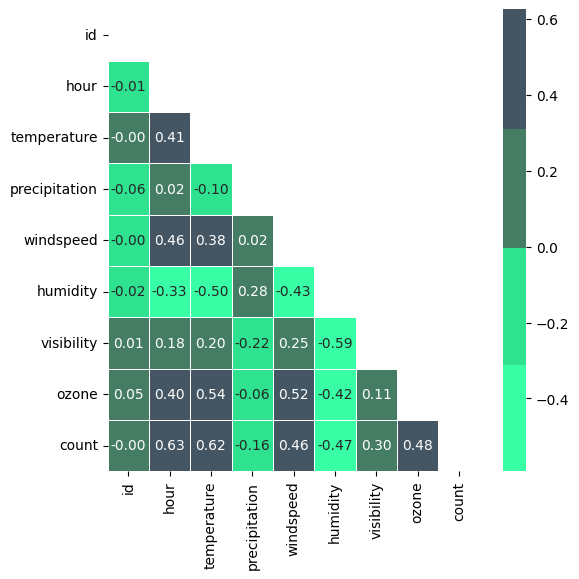

In [66]:
corr = train.corr()
plt.figure(figsize = (6,6))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, fmt=".2f", mask = mask, cmap = color,
           center = 0, linewidths = .5)
plt.show()

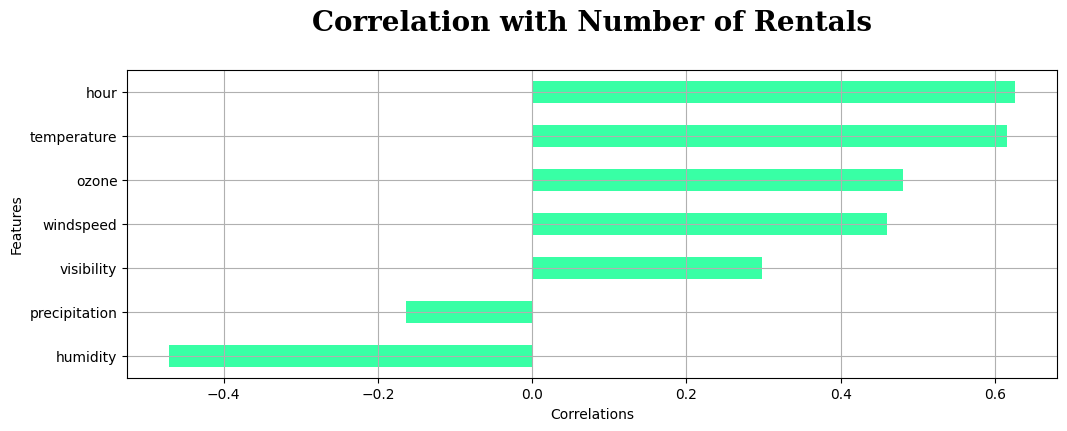

In [67]:
correlations = corr['count'].sort_values(ascending = True)
correlations = correlations[correlations != 1]
correlations = correlations[correlations.index != 'id']
correlations.plot.barh(figsize = (12,4), fontsize = 10, color = color[0], rot = 0, grid = True)
plt.title("Correlation with Number of Rentals\n", fontsize = 20, fontfamily = 'serif', fontweight = 'bold')
plt.xlabel("Correlations")
plt.ylabel("Features")
plt.show()

## 2-2. 상관관계 높은 서로 다른 독립변수 확인

In [68]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

### 1. 불쾌지수 (기온 X 습도)

In [ ]:
# 불쾌지수 변수 추가
train['discomfort'] = 0.81 * train['temperature'] + 0.01 * train['humidity'] * (0.99 * train['temperature'] - 14.3) + 46.3
train['discomfort'] = train['discomfort'].round()
train.head()

In [ ]:
temperCorr = train['temperature'].corr(train['count'])
humidCorr = train['humidity'].corr(train['count'])
discomfortCorr = train['discomfort'].corr(train['count'])
corrMatrix = train.corr()

print(f"Temperature X Rentals: {temperCorr}")
print(f"Humidity X Rentals: {humidCorr}")
print(f"Discomfort X Rentals: {discomfortCorr}")

plt.figure(figsize=(6, 6))
mask = np.triu(np.ones_like(corrMatrix, dtype = bool))
sns.heatmap(corrMatrix, annot = True, fmt=".2f", mask = mask, cmap = color,
           center = 0, linewidths = .5)
plt.title('Correlation Matrix')
plt.show()

### 2. 오존 X (기온 & 풍속)

In [ ]:
# 다변량 회귀분석
# 독립 변수와 종속 변수 설정
X = train[['windspeed', 'temperature', 'ozone']]
y = train['count']

# 독립 변수에 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 피팅
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())

In [ ]:
# 상호작용 변수 생성
train['temp_wind_interaction'] = train['temperature'] * train['windspeed']
# 독립 변수와 종속 변수 설정
X = train[['temperature', 'windspeed', 'ozone', 'temp_wind_interaction']]
y = train['count']
# 상수항 추가
X = sm.add_constant(X)
# 회귀 모델 피팅
model = sm.OLS(y, X).fit()
# 결과 요약 출력
print(model.summary())


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X = train[['temperature', 'windspeed', 'ozone', 'temp_wind_interaction']]
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 피팅
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Regression CV Scores: {-cv_scores.mean()}')

# 모델 예측 및 평가
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# 독립 변수 설정
X = train[['temperature', 'windspeed']]
X = sm.add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

train['temp_wind_interaction'] = train['temperature'] * train['windspeed']
X = train[['temperature', 'windspeed', 'temp_wind_interaction']]
X = sm.add_constant(X)

# 회귀 모델 피팅
model = sm.OLS(train['ozone'], X).fit()

# 결과 요약 출력
print(model.summary())


### 3. 가시거리 X 초미세먼지

# 예측

In [ ]:
# submission = pd.read_csv('SmallProjects/따릉이/submission.csv')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone']

# X_train= train.drop(['count'], axis = 1)
X_train = train[features]
y_train = train['count']

X_test = test[features]

## rf

In [ ]:
# 베이스라인
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# submission['count'] = y_pred
# submission.to_csv('baseline.csv', index = False)

In [ ]:
#파라미터 튜닝
params = {'min_samples_split': range(2,5),
         'max_depth': range(8,12,2),
         'n_estimators': range(250,450,50)}

gs = GridSearchCV(estimator = rf, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
gs.fit(X_train, y_train)

print('Best parameters:', gs.best_params_)
print("Best cross-validation score: {:.2f}".format(-gs.best_score_))


In [ ]:
rf_pred = gs.predict(X_test)
# submission['count'] = rf_gs_pred
# submission.to_csv('rf_gs.csv', index=False)

In [ ]:
rf_pred

## dt

In [ ]:
dt = DecisionTreeRegressor()

params = {'max_depth': range(2, 8),
         'min_samples_leaf': range(5, 20, 5)}

gs = GridSearchCV(estimator = dt, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
gs.fit(X_train, y_train)
print('Best parameters : ', gs.best_params_)
print('Best scores : {:.2f}'.format(-gs.best_score_))

In [ ]:
dt_gs_pred = gs.predict(X_test)
# submission['count'] = dt_gs_pred
# submission.to_csv('dt_gs.csv', index = False)

In [ ]:
dt_gs_pred

## gb

In [ ]:
gb = GradientBoostingRegressor()

params = {'n_estimators': range(100, 250, 50),
         'learning_rate': [0.01, 0.1, 0.2],
         'max_depth': range(1,11,2)
         }

gs = GridSearchCV(estimator = gb, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
gs.fit(X_train, y_train)
print("Best Parameter: ", gs.best_params_)
print("Best Score: {:.2f}".format(-gs.best_score_))

In [ ]:
gb_gs_pred = gs.predict(X_test)
# submission['count'] = gb_gs_pred
# submission.to_csv('gb_gs.csv', index=False)

In [ ]:
gb_gs_pred

In [ ]:
# models = {
#         'Random Forest': RandomForestRegressor(),
#          'Decision Tree': DecisionTreeRegressor(),
#          'Gradient Boosting': GradientBoostingRegressor()
#          }

# for model_name, model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     submission['count'] = y_pred
#     submission.to_csv('', index = False)


# tune parameters
# def tuning_params(X, y, params, model):
#     gs_acc = GridSearchCV(model, params, scoring = 'accuracy', cv = 5, n_jobs = -1)
#     gs_auc = GridSearchCV(model, params, scoring = 'roc_auc', cv = 5, n_jobs = -1)
    
#     gs_acc.fit(X, y)
#     gs_auc.fit(X, y)
    
#     print('Accuracy')
#     print('Train score:', gs_acc.score(X_train, y_train))
#     print('Best params:', gs_acc.best_params_)
#     print("Best estimator: ", gs_acc.best_estimator_)
#     print("Best score: ", gs_acc.best_score_)
    
#     print('\nROC_AUC')
#     print('Train score:', gs_auc.score(X_train, y_train))
#     print('Best params:', gs_auc.best_params_)
#     print("Best estimator: ", gs_auc.best_estimator_)
#     print("Best score: ", gs_auc.best_score_)
    
#     return gs_acc.best_estimator_, gs_auc.best_estimator_

## RandomForest
- **데이콘 제출 결과 Random Forest가 가장 좋은 점수를 가지고 있다**